In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from functions.transform import get_ritase
from functions.eda import timeseries_viz

In [17]:
path = 'Data Fuel Share\RITASE EX-42-44 PERJAM 2022.xlsx'
ritase_ex42 = get_ritase(path, 'ex42')
ritase_ex44 = get_ritase(path, 'ex44')
ritase_data = pd.merge(ritase_ex42, ritase_ex44)
# ritase_data.sort_values('date', ignore_index=True, inplace=True)
# ritase_data.set_index('date', inplace=True)

In [20]:
new_ritase_data = pd.melt(ritase_data, id_vars=["date"], value_vars=["ritase_ex42", "ritase_ex44"])
new_ritase_data.rename(columns={'variable': 'loader', 'value': 'ritase'}, inplace=True)
new_ritase_data

,date,loader,ritase
0,2022-01-01 06:00:00,ritase_ex42,0
1,2022-01-01 07:00:00,ritase_ex42,0
2,2022-01-01 08:00:00,ritase_ex42,0
3,2022-01-01 09:00:00,ritase_ex42,0
4,2022-01-01 10:00:00,ritase_ex42,0
...,...,...,...
17515,2022-12-31 01:00:00,ritase_ex44,0
17516,2022-12-31 02:00:00,ritase_ex44,0
17517,2022-12-31 03:00:00,ritase_ex44,0
17518,2022-12-31 04:00:00,ritase_ex44,0


In [3]:
# Select data from 1-31 january 2022
ritase_data.query('20220101 <= date < 20220201')

,ritase_ex42,ritase_ex44
date,,
2022-01-01 01:00:00,0,0
2022-01-01 02:00:00,0,5
2022-01-01 03:00:00,0,10
2022-01-01 04:00:00,0,11
2022-01-01 05:00:00,0,10
...,...,...
2022-01-31 19:00:00,0,0
2022-01-31 20:00:00,0,0
2022-01-31 21:00:00,0,0


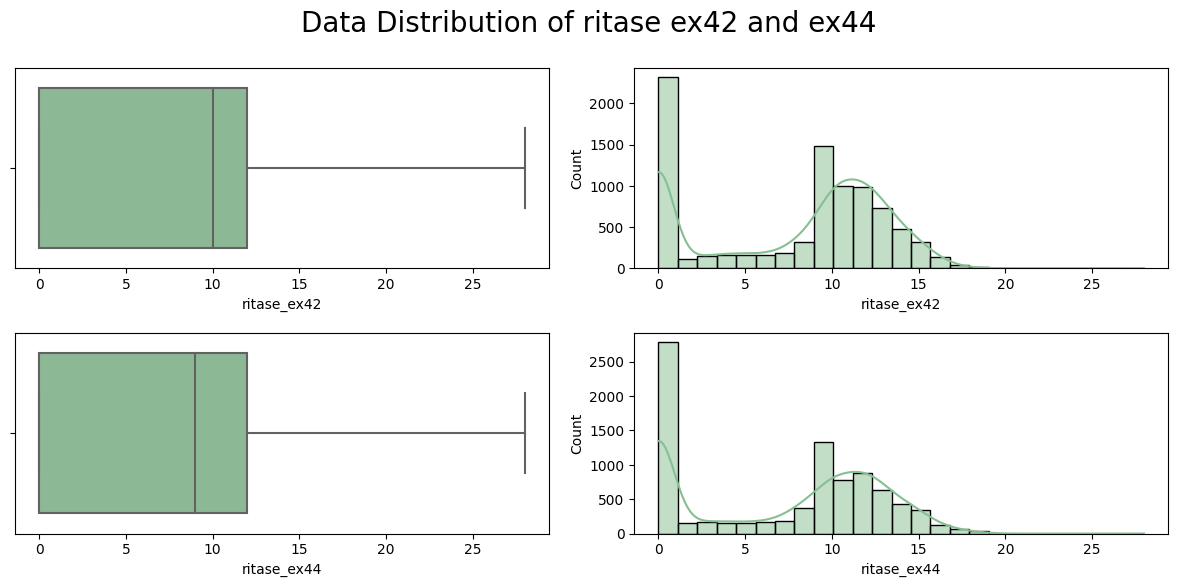

In [4]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 6))
for i,j in enumerate(list(ritase_data.columns)):
    sns.boxplot(x=ritase_data[j], color='#86bf91', ax=ax[i][0])
    sns.histplot(x=ritase_data[j], color='#86bf91', kde=True, bins=25, ax=ax[i][1])
fig.suptitle("Data Distribution of ritase ex42 and ex44", fontsize = 20)
plt.tight_layout(pad = 1.5)

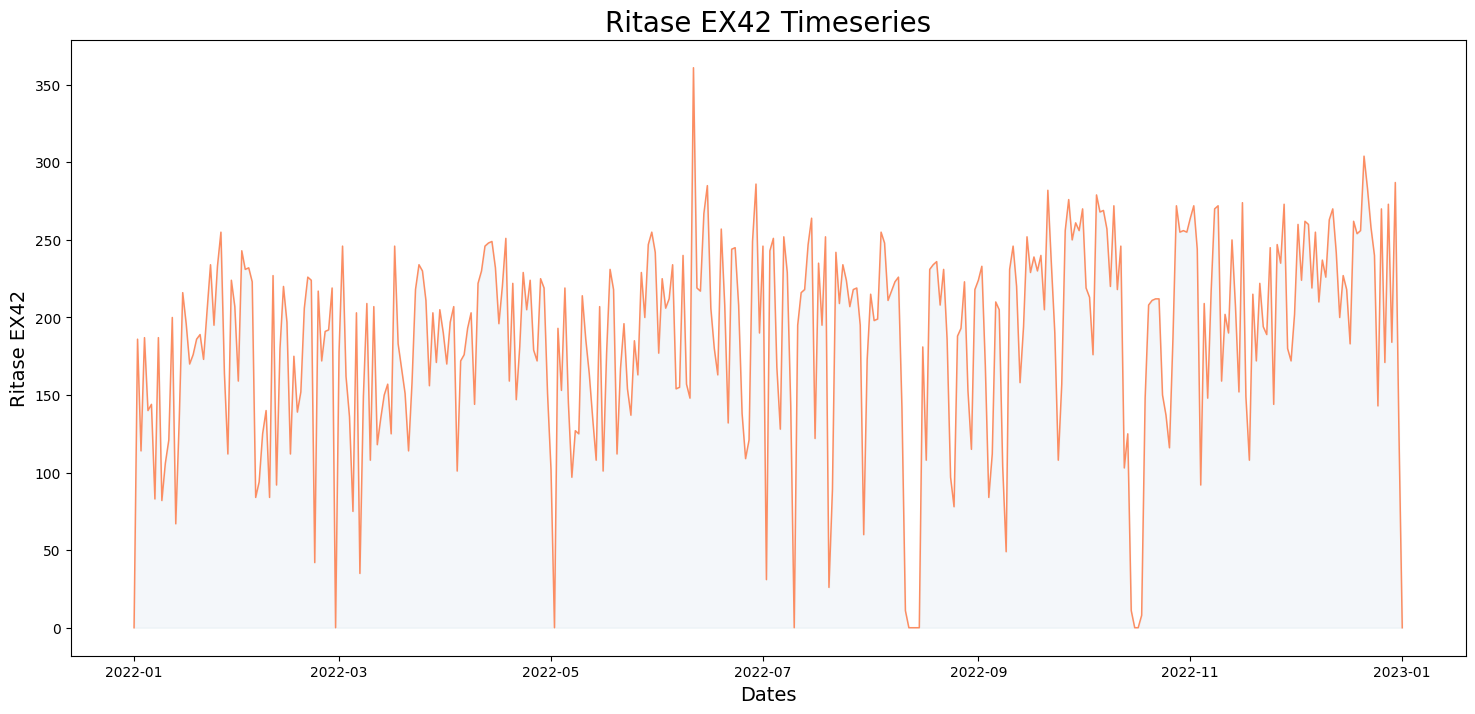

In [5]:
timeseries_viz(ritase_data, 'ex42', 'D')

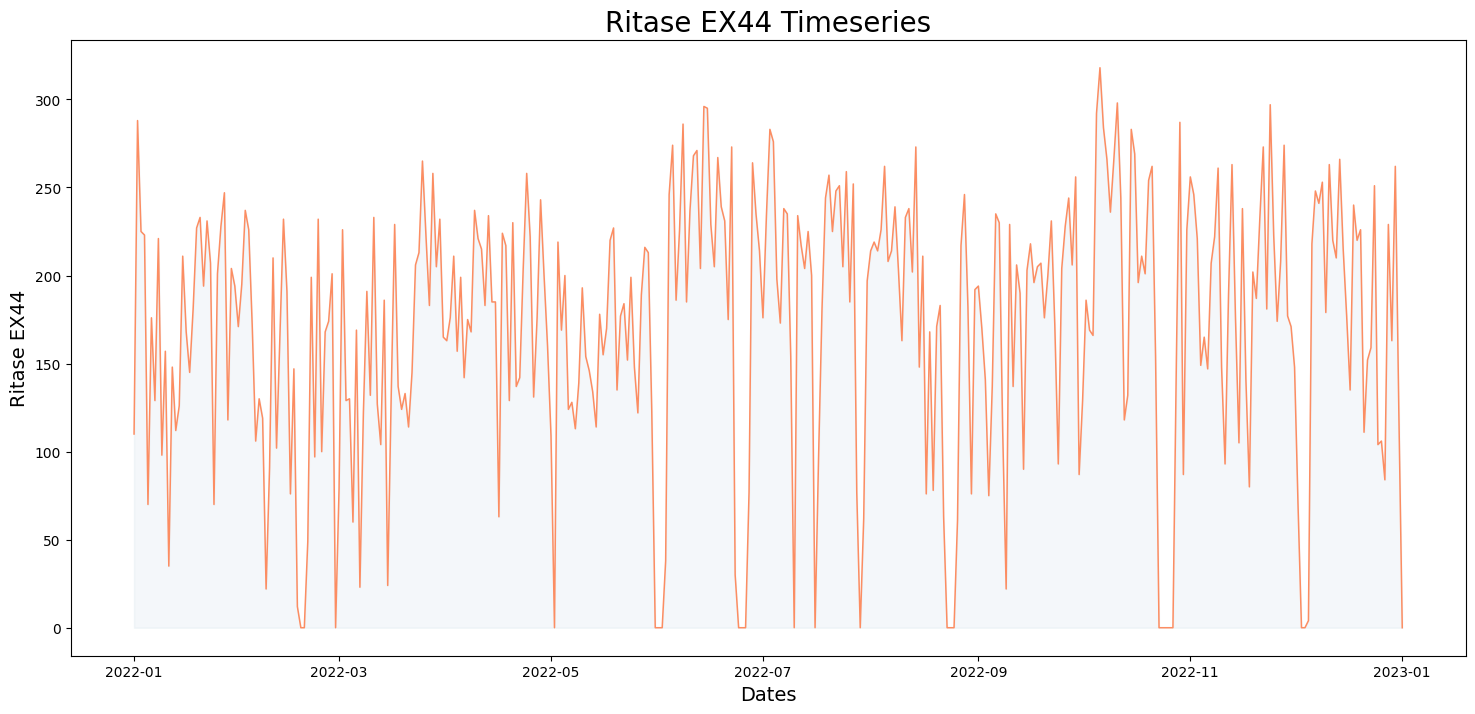

In [6]:
timeseries_viz(ritase_data, 'ex44', 'D')

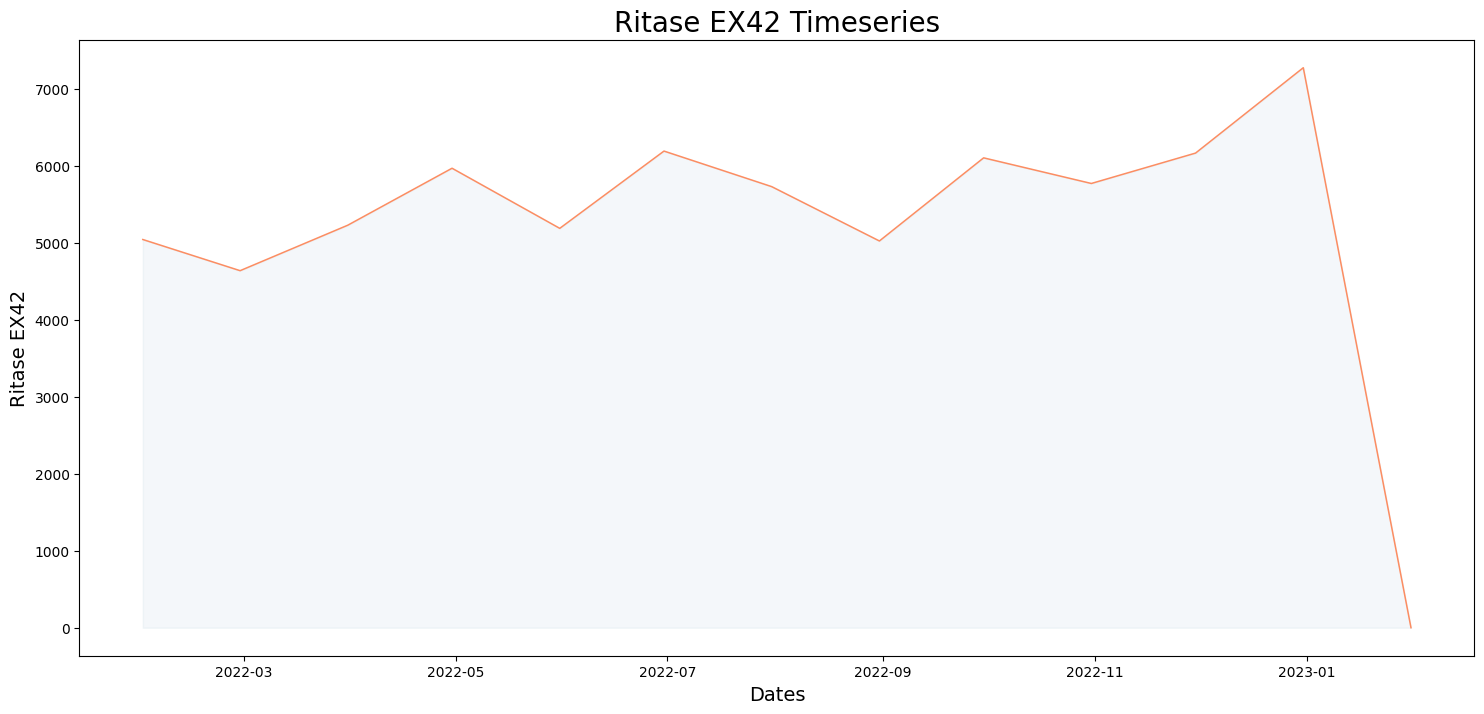

In [7]:
timeseries_viz(ritase_data, 'ex42', 'M')

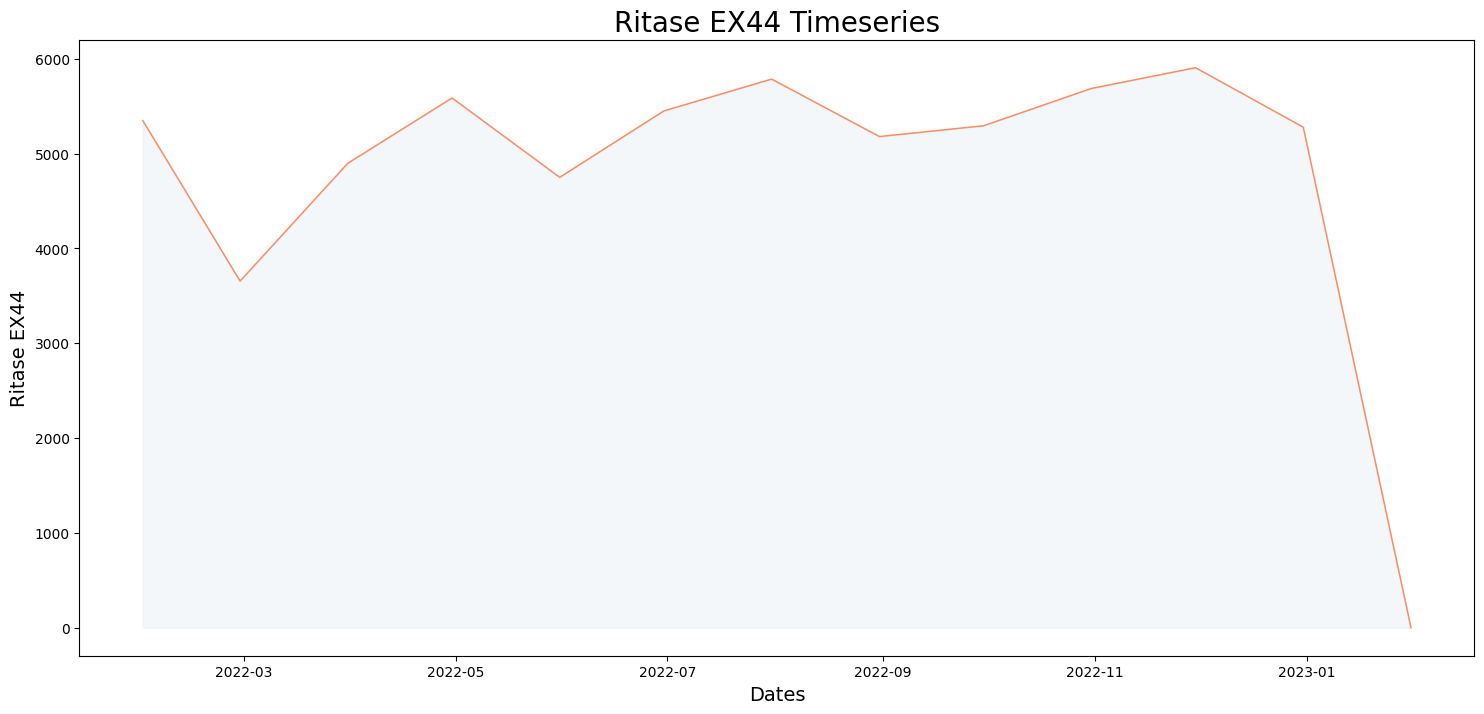

In [8]:
timeseries_viz(ritase_data, 'ex44', 'M')